VIII.11.5

Методами разных порядков аппроксимации численно решить 
систему Лоренца:
$$
\begin{cases}
x' = -\sigma*(x-y) \\
y' = -xz + rx -y \\
z' = xy-bz \\
x(0) = y(0) = z(0) = 1
\end{cases}
$$

при 
b = 8/3, $\sigma = 10$, r = 28. 
Считаем, что $0 < t \le 50. $
Объяснить полученные результаты.

In [258]:
import numpy as np
import matplotlib.pyplot as plt


### 1) Методы Рунге-Кутта

Метод Рунге-Кутта четвертого порядка (RK4) является одним из самых популярных и эффективных методов численного решения обыкновенных дифференциальных уравнений.

Явные методы Рунге-Кутты

$$
\begin{cases}
y_{l+1} = y_l + h \sum \limits_{i = 1}^{s} b_i f_i \\
f_i = f(x_l + c_i h, y_l + h \sum \limits_{j = 1}^{i - 1} a_{ij} f_j), ~~i=\overline{1, s} 
\end{cases}
$$

Таблица Бутчера для классического метода Рунге-Кутты 4-порядка:


|       0       |       0       |       0       |       0       |       0       |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| $\frac{1}{2}$ | $\frac{1}{2}$ |       0       |       0       |       0       |
| $\frac{1}{2}$ |       0       | $\frac{1}{2}$ |       0       |       0       |
|       1       |       0       |       0       |       1       |       0       |
|               | $\frac{1}{6}$ | $\frac{2}{6}$ | $\frac{2}{6}$ | $\frac{1}{6}$ |

$$
\begin{cases}
f_1 = f(x_l, y_l) \\
f_2 = f(x_l + \frac{1}{2} h, y_l + \frac{1}{2} h f_1) \\
f_3 = f(x_l + \frac{1}{2} h, y_l + \frac{1}{2} h f_2) \\
f_4 = f(x_l + h, y_l + h f_3) \\
y_{l+1} = y_l + h \cdot \left(\frac{1}{6} f_1 + \frac{2}{6} f_2 + \frac{2}{6} f_3 + \frac{1}{6} f_4 \right)

\end{cases}
$$



In [259]:
# Функция метода Рунге-Кутта 4-го порядка
def RungeKutta4(h, a, b, y_0, f):
    
    t = np.arange(a, b+h, h)
    res = np.zeros((len(t), len(y_0)))
    res[0] = y_0

    for i in range(1, len(t)):
        f_1 = f(t[i-1], res[i-1])
        f_2 = f(t[i-1] + 0.5*h, res[i-1] + 0.5*h*f_1)
        f_3 = f(t[i-1] + 0.5*h, res[i-1] + 0.5*h*f_2)
        f_4 = f(t[i-1] + h, res[i-1] + h*f_3)
        res[i] = res[i-1] + (h/6)*(f_1 + 2*f_2 + 2*f_3 + f_4)
    
    return t, res

In [260]:
def printPlot(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    plt.show()

In [261]:
# Параметры системы Лоренца
sigma = 10.0
beta = 8.0 / 3.0
rho = 28

# Функция системы Лоренца
def lor_system(t, y):
    x, y, z = y
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Параметры интеграции
a = 0     # Начальное время
b = 50.0  # Конечное время
y_0 = np.array([1.0, 1.0, 1.0])  # Начальные условия
h = 0.01  # Шаг

# Решение системы
t, res = RungeKutta4(h, a, b, y_0, lor_system)

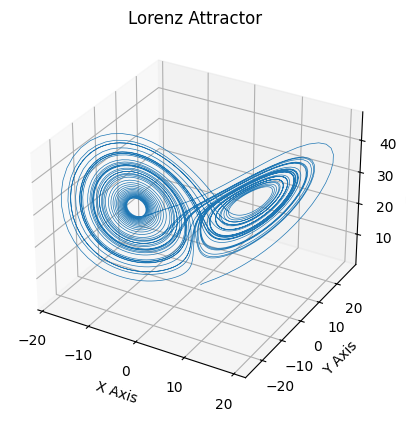

In [262]:
printPlot(res[:, 0], res[:, 1], res[:, 2])

## 2) Метод Адамса

Чтобы решить систему Лоренца методом Адамса 4-го порядка, нам все равно придется сначала вычислить несколько начальных точек, так как этот метод является многошаговым и требует предыдущих значений для вычисления следующих. Чтобы упростить задачу, мы вычислим эти начальные значения с помощью метода Эйлера. После этого применим метод Адамса


Методы Адамса 

k-го порядка требуют предварительного вычисления решения в 

k начальных точках. Для вычисления начальных значений обычно используют одношаговые методы, например, 4-стадийный метод Рунге — Кутты 4-го порядка точности.

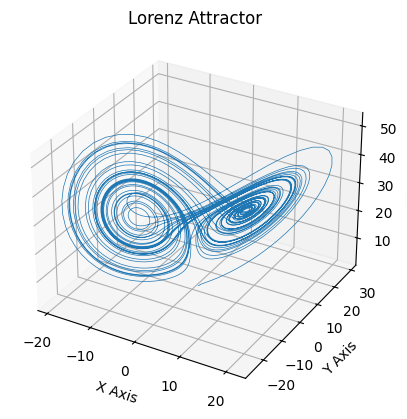

In [263]:
# метод Эйлера для получения начальных значений
def euler_step(X, Y, Z, dt):
    derivative = lor_system(dt, [X,Y, Z])
    X_next = X + derivative[0] * dt
    Y_next = Y + derivative[1] * dt
    Z_next = Z + derivative[2] * dt
    return X_next, Y_next, Z_next

# метод Адамса-Башфорта 4-го порядка
def adams_bashforth(X, Y, Z, dt, hist):
    a = np.array([55, -59, 37, -9]) / 24
    derivatives = np.array([lor_system(dt, [X, Y, Z]) for x, y, z in hist])
    derivative = np.dot(a, derivatives)
    X_next = X + derivative[0] * dt
    Y_next = Y + derivative[1] * dt
    Z_next = Z + derivative[2] * dt
    return X_next, Y_next, Z_next

dt = 0.01
num_steps = 5000
history = np.empty((4, 3))

# Начальные условия
X, Y, Z = 1.0, 1.0, 1.0
history[0] = X, Y, Z

# Получаем три дополнительных начальных точки методом Эйлера
for i in range(1, 4):
    X, Y, Z = euler_step(X, Y, Z, dt)
    history[i] = X, Y, Z

# Инициализация массивов для хранения траекторий
xs, ys, zs = [1.0], [1.0], [1.0]

# Выполнение метода Адамса-Башфорта
for _ in range(num_steps - 3):
    X, Y, Z = adams_bashforth(X, Y, Z, dt, history)
    history = np.roll(history, -1, axis=0)
    history[-1] = X, Y, Z
    xs.append(X)
    ys.append(Y)
    zs.append(Z)


printPlot(xs, ys, zs)

## 3) Методы ФДН

 Метод ФДН подходит для жёстких систем и часто используется в задачах с большими или комплексными системами дифференциальных уравнений, как система Лоренца. 

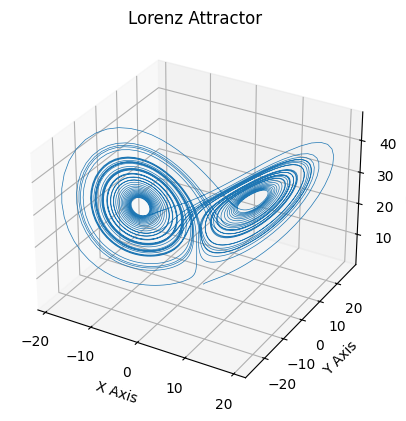

In [264]:
def bdf4_step(y_old, y_old2, y_old3, y_old4, h, t_new):
    y_new = y_old  # начальное приближение
    for _ in range(100):  # Максимальное количество итераций
        y_new_prev = y_new
        y_new = (48/25)*y_old - (36/25)*y_old2 + (16/25)*y_old3 - (3/25)*y_old4 + (12/25)*h*lor_system(t_new, y_new)
        if np.allclose(y_new, y_new_prev, rtol=1e-5):
            break
    return y_new

times = np.arange(a, b, h)
bdf_results = np.empty((len(times), 3))  
bdf_results[0] = y_0
bdf_results[1] = bdf_results[0] + h*lor_system(times[0], bdf_results[0])  # метод Эйлера для второго шага
bdf_results[2] = bdf_results[1] + h*lor_system(times[1], bdf_results[1])  # метод Эйлера для третьего шага
bdf_results[3] = bdf_results[2] + h*lor_system(times[2], bdf_results[2])  # метод Эйлера для четвертого шага

for i in range(4, len(times)):
    bdf_results[i] = bdf4_step(bdf_results[i-1], bdf_results[i-2], bdf_results[i-3], bdf_results[i-4], h, times[i])

printPlot(bdf_results[:, 0],bdf_results[:, 1], bdf_results[:, 2])
